# Perceptron code implementation.

In [1]:
import torch

import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

(800, 2) (200, 2) (800,) (200,)


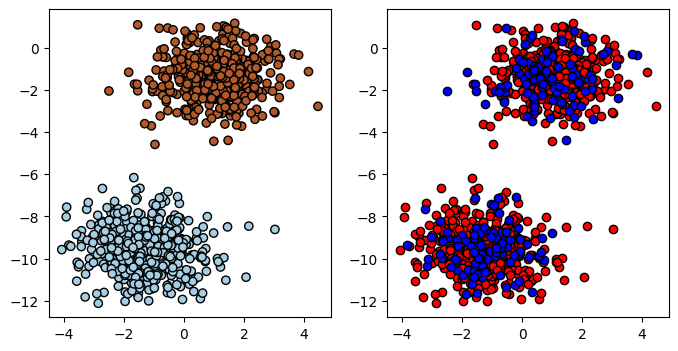

In [4]:
X, y = make_blobs(n_samples=1000, n_features=2, centers=2, cluster_std=1.05, random_state=2)

X_train, X_test, y_train, y_test = train_test_split( X , y , test_size = 0.20, random_state = 2)
print ( X_train.shape, X_test.shape, y_train.shape, y_test.shape )

_, axes = plt.subplots(1,2, figsize=(8,4))

# plot everythig
axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='Paired', edgecolors='k')
axes[1].scatter(X_train[:, 0], X_train[:, 1], c='r', edgecolors='k')
axes[1].scatter(X_test[:, 0], X_test[:, 1], c='b', edgecolors='k')

## Perceptron code

In [15]:
m1 = np.random.rand(800,2)
m2 = np.random.rand(2,1)
print (np.dot(m2.T, m1.T).shape)
print (np.dot(m1, m2).shape)

(1, 800)
(800, 1)


In [37]:

class Perceptron():
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = torch.zeros( num_features , 1) # (800, 2) x (2, 1)
        self.bias = torch.zeros(1)

    def activation(self, cond, x_1, x_2):
      return (cond * x_1) + (~(cond) * x_2)

    def forward(self, x ):
        y = torch.add(torch.mm( x , self.weights ), self.bias )
        predictions = self.activation(y > 0., 1, 0).float() # Step
        return predictions

    def backward(self, x, y):
        predictions = self.forward(x)
        errors = y - predictions
        return errors

    def train(self, x, y, epochs):
        for epoch in range( epochs ):
            for i in range(y.shape[0]):
                errors = self.backward(x[i].view(1, self.num_features), y[i]).view(-1)
                self.weights += (errors * x[i]).view(self.num_features, 1)
                self.bias += errors

    def evaluate(self, x, y):
        predictions = self.forward(x).view(-1)
        accuracy = torch.sum(predictions == y).float() / y.size()[0]
        return accuracy

In [38]:
ppn = Perceptron(num_features=2)

X_train_tensor = torch.from_numpy( X_train ).type(torch.FloatTensor).to('cpu')
y_train_tensor = torch.from_numpy( y_train ).type(torch.FloatTensor).to('cpu')

# print (X_train_tensor.shape, y_train_tensor.size())
ppn.train( X_train_tensor , y_train_tensor , epochs=100)

In [39]:
print('Model parameters:')
print('  Weights: %s' % ppn.weights)
print('  Bias: %s' % ppn.bias)

Model parameters:
  Weights: tensor([[3.9296],
        [4.7201]])
  Bias: tensor([27.])


In [40]:
X_test_tensor = torch.from_numpy( X_test ).type(torch.FloatTensor).to('cpu')
y_test_tensor = torch.from_numpy( y_test ).type(torch.FloatTensor).to('cpu')

test_acc = ppn.evaluate( X_test_tensor , y_test_tensor )
print('Test set accuracy: %.2f%%' % (test_acc*100))

Test set accuracy: 100.00%


## Plot everything

In [41]:
# Min max values for the decision bounding grid
h_min, h_max = X_test[:,0].min()-0.1 , X_test[:,0].max()+0.1
v_min, v_max = X_test[:,1].min()-0.1 , X_test[:,1].max()+0.1

# Create the grid
h_grid, v_grid = np.meshgrid(np.arange( h_min , h_max , 0.1), np.arange( v_min , v_max , 0.1))

# Predict
to_predict = torch.from_numpy(np.c_[h_grid.ravel(), v_grid.ravel()]).type(torch.FloatTensor).to('cpu')
predictions = ppn.forward( to_predict )
predictions = predictions.numpy().reshape(h_grid.shape)

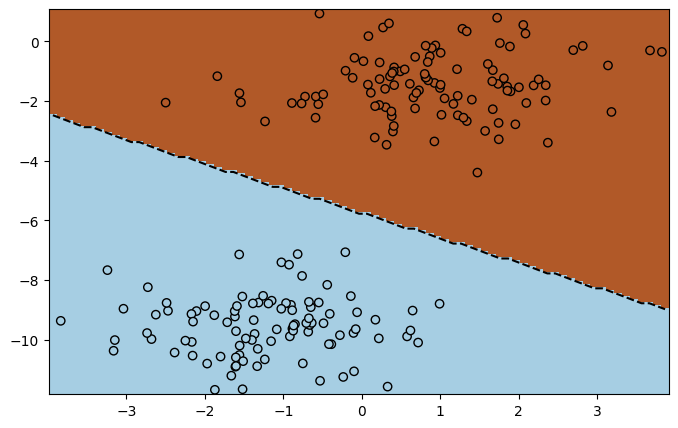

In [42]:
# Draw everything
_, ax = plt.subplots (figsize=(8,5))
ax.pcolormesh( h_grid , v_grid , predictions , cmap = plt.cm.Paired)
ax.contour(  h_grid , v_grid , predictions, colors=['k', 'k', 'k'], linestyles=['--', '--', '--'], levels=[0, 1, 2])

# show the scatter
ax.scatter (  X_test[:, 0],  X_test[:, 1] ,  c = y_test , edgecolors='k', cmap=plt.cm.Paired)

# ax.set_xticks(())
# ax.set_yticks(())